In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
import scipy
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")

 **K means implementation 
 Question 1 part a**

In [2]:
def k_means(f, m = 2):                  #### here f is the data and m is the number of clusters
    mu_center = f.sample(n = m)
    theta = 100000
    theta_diff = 100000
    i = 0
    while theta_diff > 1:
        i += 1
        a = cdist(f.iloc[:,:2],mu_center.iloc[:,:2], metric='euclidean')
        f['min_dist'] = a.min(axis=1)
        f['Cluster'] = a.argmin(axis =1)
        theta_diff = theta - f['min_dist'].sum()
        theta = f['min_dist'].sum()
        mu_center = f.groupby(['Cluster']).mean()
        mu_center = mu_center.drop(['min_dist'],axis = 1).reset_index(drop=True)
    else:
        print("Iteration",i,"coverges.")
    f['Cluster'] += 1 
    f = f.rename(index=str, columns={'X': 'Length', 'Y': 'Width'})
    return f , mu_center

**Plotting data from text file 
Question 1 part b**

Iteration 4 coverges.
Centroids of the clusters are given below 
           X         Y
0  1.004370  0.004422
1  3.084087 -0.002056


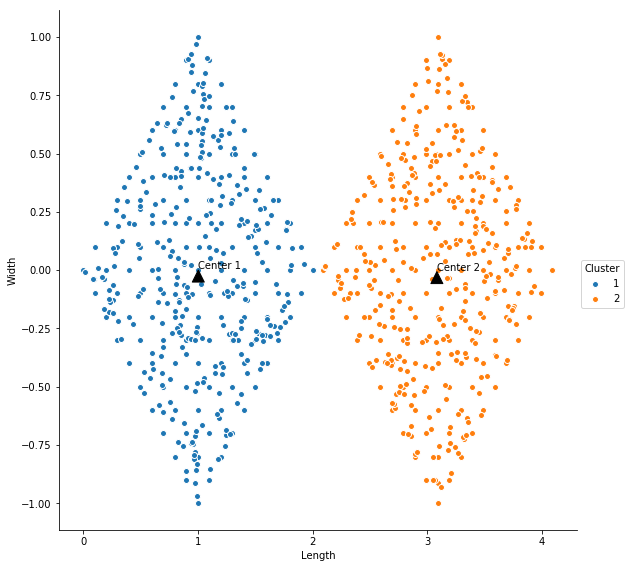

In [3]:
d_path = os.getcwd()   ### get the path of the directory where the code lies

### make sure cluster_data.txt is in the same folder as the python file
f = pd.read_csv(d_path + '/cluster_data.txt',sep ="\t",  header = None, names = ["X","Y"])
df , mu = k_means(f, m = 2)

print('Centroids of the clusters are given below',"\n",mu)

sns.pairplot(x_vars = 'Length' , y_vars = 'Width', data = df, hue="Cluster",size = 8)
for index, row in mu.iterrows():
    plt.annotate('Center '+ str(index + 1), xy=tuple(row),arrowprops=dict(facecolor='black', shrink=0.5))
    ## add this in before first comma in annotate if you want to see point values in plot : +" "+ str(tuple(row))
plt.show()

Iteration 4 coverges.
Centroids of the clusters are given below 
           X         Y
0  2.705964  0.297093
1  3.510397  0.135696
2  3.000694 -0.485044
3  0.995015  0.004402


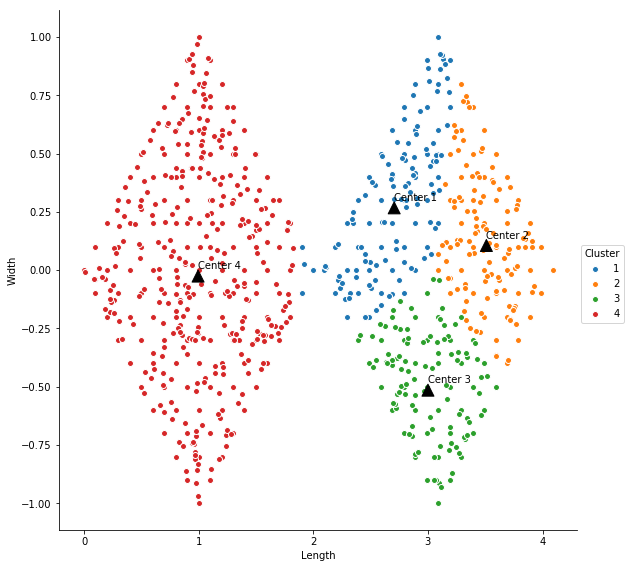

In [4]:
d_path = os.getcwd()
f = pd.read_csv(d_path + '/cluster_data.txt',sep ="\t",  header = None, names = ["X","Y"])
df , mu = k_means(f, m = 4)

print('Centroids of the clusters are given below',"\n",mu)

sns.pairplot(x_vars = 'Length' , y_vars = 'Width', data = df, hue="Cluster",size = 8)

for index, row in mu.iterrows():
    plt.annotate('Center '+ str(index + 1), xy=tuple(row),arrowprops=dict(facecolor='black', shrink=0.5))
    ## add this in before first comma in annotate if you want to see point values in plot : +" "+ str(tuple(row))
plt.show()

Iteration 4 coverges.
Centroids of the clusters are given below 
           X         Y
0  2.769115  0.177515
1  3.394802 -0.192448
2  0.961093 -0.325860
3  1.035309  0.396702


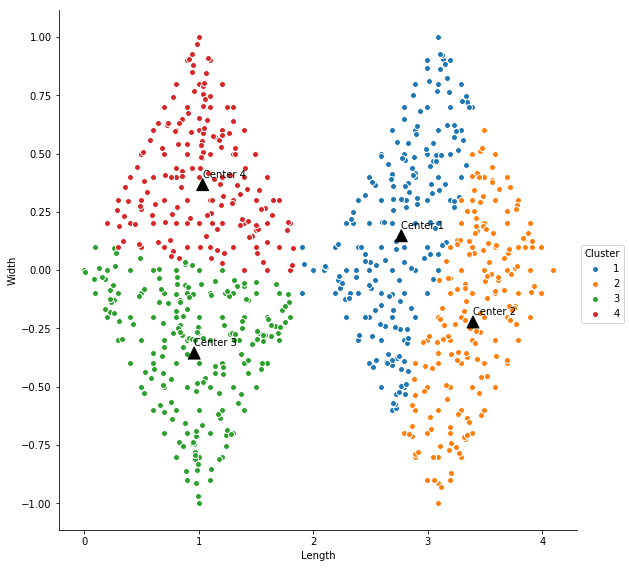

In [5]:
d_path = os.getcwd()
f = pd.read_csv(d_path + '/cluster_data.txt',sep ="\t",  header = None, names = ["X","Y"])
df , mu = k_means(f, m = 4)

print('Centroids of the clusters are given below',"\n",mu)

sns.pairplot(x_vars = 'Length' , y_vars = 'Width', data = df, hue="Cluster",size = 8)
for index, row in mu.iterrows():
    plt.annotate('Center '+ str(index + 1), xy=tuple(row),arrowprops=dict(facecolor='black', shrink=0.5))
    ## add this in before first comma in annotate if you want to see point values in plot : +" "+ str(tuple(row))
plt.show()

**Explanation **

As we can see from diagrams above the K-means algorithm doesn't always reach the global minimum.
This happens due to the fact that the algorithm is data order and centre starting biased, i.e. it depends
on the starting centroids and order of the data whether we will find the best clusters (global minima) or any of the other possible clusters(local minima).

For example, in case of 4 clusters it gives different answers everytime we run it. In case 1 it took left quadrilateral as 1 cluster and divided other quadrilateral in 3 parts in case 2 it divided both quadrilateralin two parts. This is due to the drawback explained above